# Why Matplotlib Figure Inches Don't Match Your Screen Inches and How to Fix it

If you've worked with the matplotlib data visualization library before, then you'll be familiar with the term **figsize**, which is measured in **figure inches**. In a Jupyter Notebook, these default to 6 inches in width by 4 inches in height. But, if you actually measured the physical screen inches on your monitor, you're likely to get different numbers. This post details why this mismatch exists and how to change the settings of your plot so that the matplotlib figure inches match the physical screen inches exactly.

### Create a plot

We begin by reading in the diamonds dataset and create a scatter plot of carat vs price.

In [1]:
import pandas as pd
diamonds = pd.read_csv('../../data/diamonds.csv')
diamonds.head(3)

,carat,price,shape,clarity,color,cut,depth,fluorescence,lxwRatio,polish,symmetry,table
0,0.23,250,Princess,VS1,H,Good,74.0,None,1.01,Very Good,Good,81.0
1,0.23,250,Princess,VS1,H,Good,77.8,None,1.00,Very Good,Good,71.0
2,0.32,253,Princess,SI2,I,Very Good,74.7,None,1.04,Excellent,Very Good,72.0


Jupyter Notebooks automatically crop some of the figure so it tightly wraps around the outer elements. To show the entire figure we need to run the following command.

In [2]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

For clarity, the `figsize` is set to `(6, 4)`, though this is unnecessary as that is the default value.

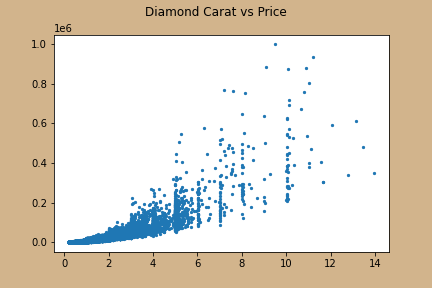

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4), facecolor='tan')
ax.scatter(x='carat', y='price', data=diamonds, s=5)
fig.suptitle('Diamond Carat vs Price');

### Measuring the physical screen inches

You can use a physical ruler or an application native to your machine to find the physical screen inches. I used an application called [Free Ruler](https://apps.apple.com/us/app/free-ruler/id1483172210?mt=12) on my Mac and captured the image below. The actual physical screen inches of the figure are about 2.9 x 1.9 or just under 50% of the matplotlib figure size of 6 x 4.

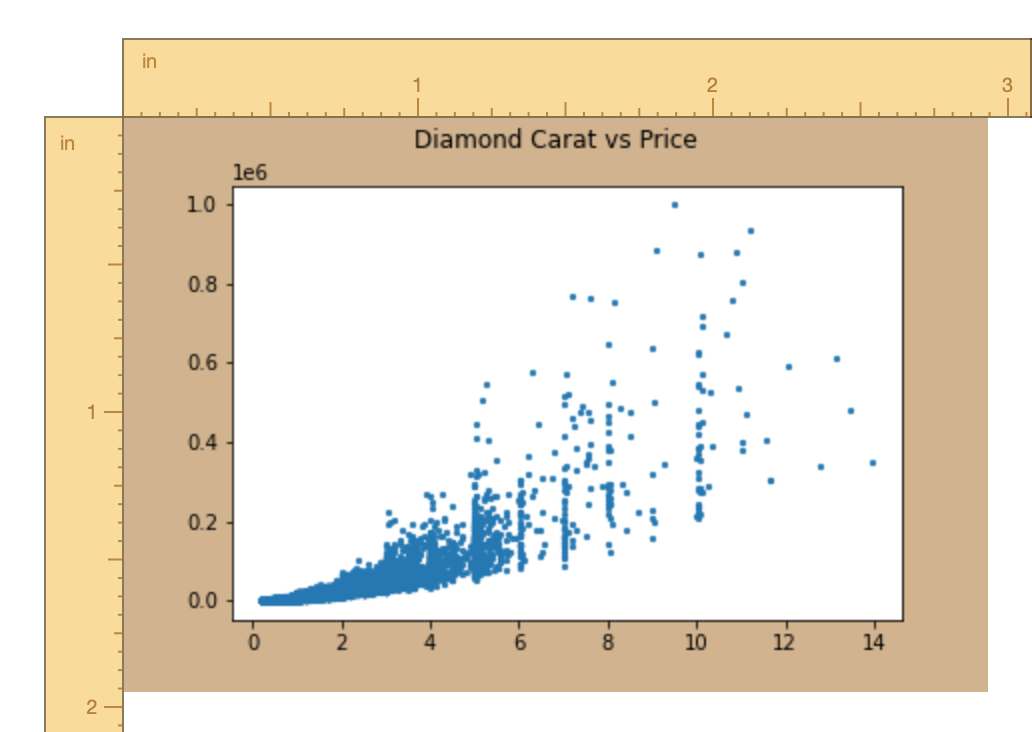

### DPI Mismatch

The reason for this difference is a mismatch between the matplotlib figure DPI (dots per inch) and your screen's DPI. By default, Jupyter Notebooks set the DPI for matplotlib figures to 72, which we verify below.

In [4]:
fig.dpi

72.0

Multiplying the DPI by the figure inches provides the dimensions of the figure in pixels. This makes our current figure 432 pixels by 288 pixels. Most modern monitors have a higher DPI than than 72, which is the reason the figures appear as less physical screen inches. For example, if your monitor has a DPI of 100, then the physical screen inches would be 4.32 by 2.88 inches.

### Getting your screen's DPI

Getting your screen's DPI is a little tricky. The settings for my Mac show the screen as 2880 by 1800 pixels and 15.4 inches in diagonal, but do not display the DPI itself. The pixel dimensions can be scaled down below their stated values. I used [What is my Screen Resolution](http://whatismyscreenresolution.net/) to get my specific pixel dimensions, which are really 1920 x 1200.

### Use function to get DPI

We still do not have our DPI, but can use the Pythagorean theorem to calculate them. The following function accepts the width and height as pixels and diagonal in inches and returns the DPI.

In [5]:
def find_dpi(w, h, d):
    """
    w : width in pixels
    h : height in pixels
    d : diagonal in inches
    """
    w_inches = (d ** 2 / (1 + h ** 2 / w ** 2)) ** 0.5
    return round(w / w_inches)

find_dpi(1920, 1200, 15.4)

147

My monitor's DPI is 147. Let's divide the current pixel dimensions by this DPI to calculate physical screen inches and determine if it matches the measurement from Free Ruler above.

In [6]:
432 / 147, 288 / 147

(2.938775510204082, 1.9591836734693877)

### Setting the figure DPI

Set the DPI upon figure creation by setting the `dpi` parameter. 

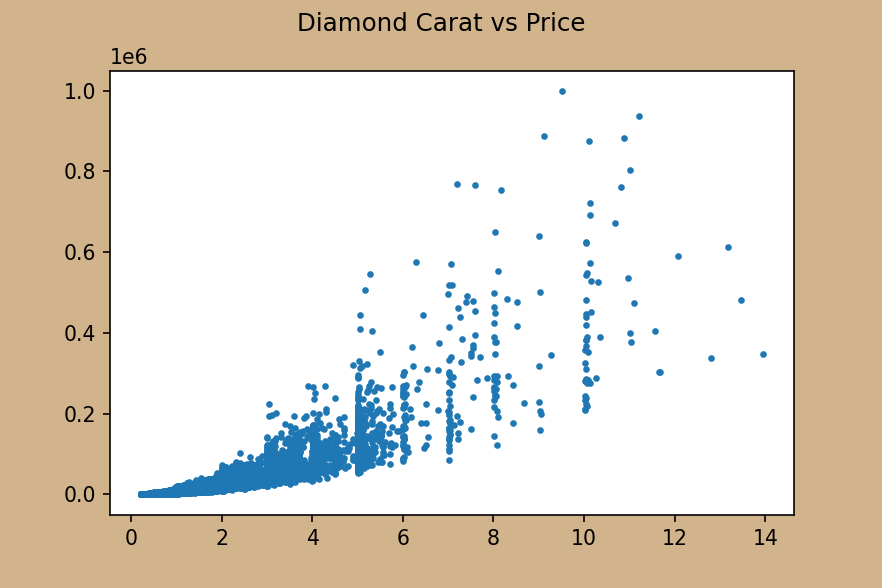

In [7]:
fig, ax = plt.subplots(figsize=(6, 4), facecolor='tan', dpi=147)
ax.scatter(x='carat', y='price', data=diamonds, s=5)
fig.suptitle('Diamond Carat vs Price');

### Physical screen inches should now be the same as the matplotlib figure inches

We verify with Free Ruler that the physical screen inches are the same as the matplotlib figure inches, 6 x 4.

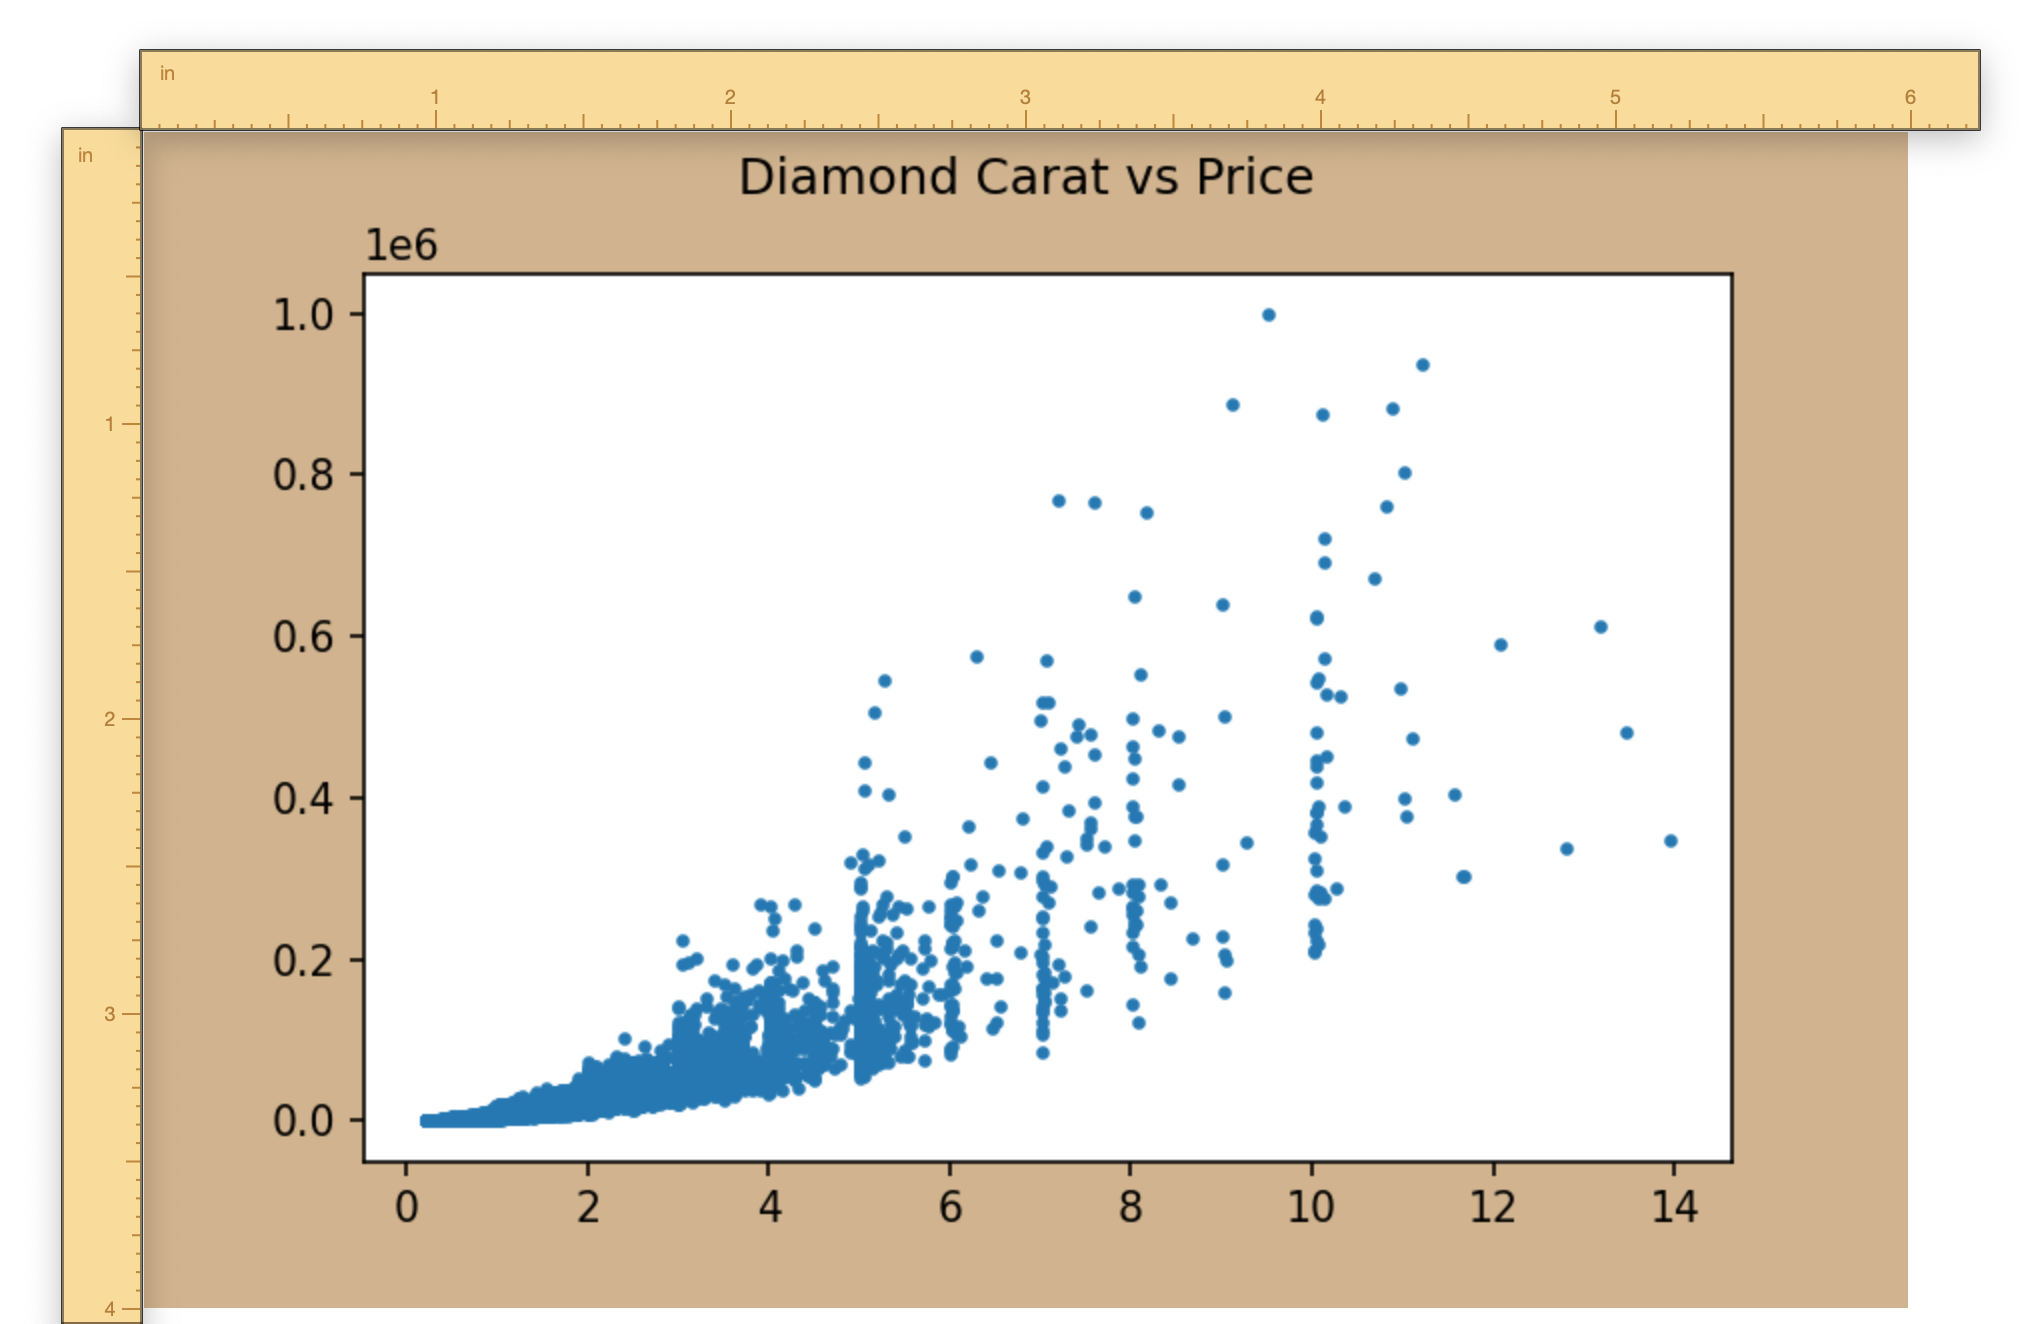

## Use this DPI for all your figures

Continue to set the `dpi` parameter to your monitor's DPI to have matplotlib figure inches match the physical screen inches. Note, that if you create a figure larger than viewable area in a notebook (30 x 15 for example), it will be scaled down to fit inside of a notebook cell and will not match the physical screen inches.

### Master Data Analysis with Python

If you enjoyed this tip, then check out my comprehensive book [Master Data Analysis with Python](https://www.dunderdata.com/master-data-analysis-with-python) that teaches you how to become an expert at using Python and Pandas to do data analysis.